<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_exatas/blob/main/BS_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
from sympy.stats import *
X = Normal("X", 0, 1)
S = Symbol('S')

In [2]:
init_printing(pretty_print = True)

In [3]:
def BlackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        if type == "c":
            price = price = S*N(P(X<=d1)) - K*exp(-r*T)*N(P(X<=d2))
        elif type == "p":
            price = K*exp(-r*T)*N(P(X<=-d2)) - S*N(P(X<=-d1))
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [4]:
def delta(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    try:
         if type == "c":
            delta = N(P(X <= d1))
         elif type == "p":
            delta = -N(P(X <= d1))
         return delta
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [5]:
def gamma(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        gamma = N(P(X <= d1))/(S*sigma*np.sqrt(T))
        return gamma
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [6]:
def vega(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        vega = S*N(P(X <= d1))*sqrt(T)
        return vega*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [7]:
def theta(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        if type == "c":
            theta = -S*N(P(X <= d1))*sigma/(2*sqrt(T)) - r*K*exp(-r*T)*N(P(X <= d2))
        elif type == "p":
            theta = -S*N(P(X <= d1))*sigma/(2*sqrt(T)) + r*K*exp(-r*T)*N(P(X <= -d2))
        return theta/365
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [8]:
def rho(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        if type == "c":
            rho = K*T*exp(-r*T)*N(P(X <= d2))
        elif type == "p":
            rho = -K*T*exp(-r*T)*N(P(X <= -d2))
        return rho*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")


In [9]:
r = 0.125       # Interest tax
#S = 97          # Stock
#S = Symbol('S')
K = 100         # Stirke
#T = 1/252      # Time to end
T = 0.2/252
sigma = 0.60    # Volatility
type="c"

In [10]:
BS = BlackScholes(r, S, K, T, sigma, type="c")
Ativo = S-K

In [11]:
BSGráfico = plot(BS, Ativo,(S, 90, 110), show=False, title='Prêmios x Ativo', xlabel='Preços Ativo', ylabel='Valor Prêmio',  legend=True)

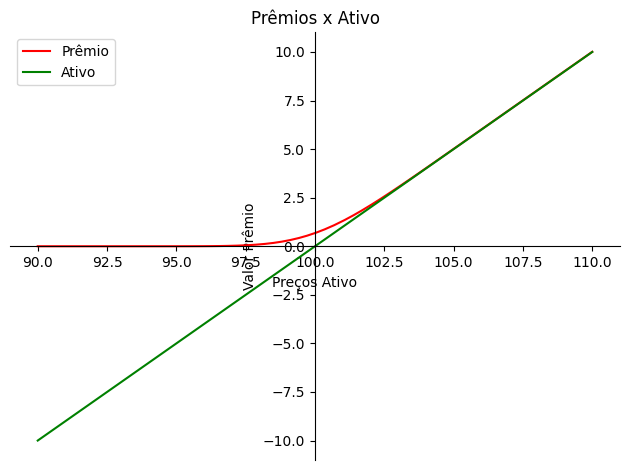

In [12]:
BSGráfico[0].line_color = 'red'
BSGráfico[0].label = 'Prêmio'
BSGráfico[1].line_color = 'green'
BSGráfico[1].label = 'Ativo'
BSGráfico[1].line_size = 4
BSGráfico.show()

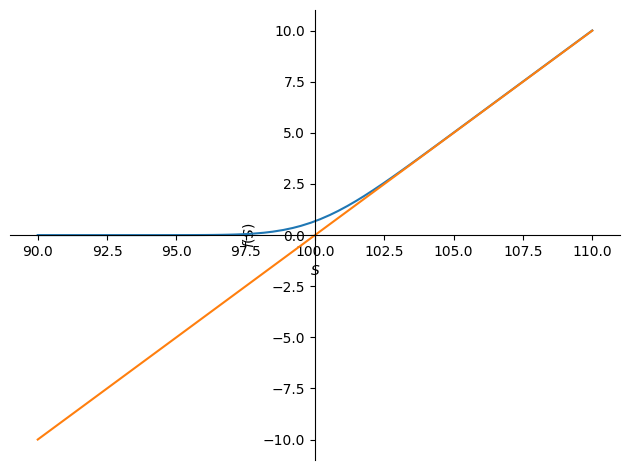

In [13]:
plot(BS, Ativo, (S, 90, 110))

In [14]:
Ti = [20/252,10/252,3.0/252,0.1/252]
BS1 = BlackScholes(r, S, K, Ti[0], sigma, type="c")
BS2 = BlackScholes(r, S, K, Ti[1], sigma, type="c")
BS3 = BlackScholes(r, S, K, Ti[2], sigma, type="c")
BS4 = BlackScholes(r, S, K, Ti[3], sigma, type="c")

In [15]:
p = plot(BS1, BS2, BS3, BS4, (S, 90, 110), show=False, title='Evolução dos Prêmios no tempo', xlabel='Preços Ativo', ylabel='Valor Prêmio',  legend=True)

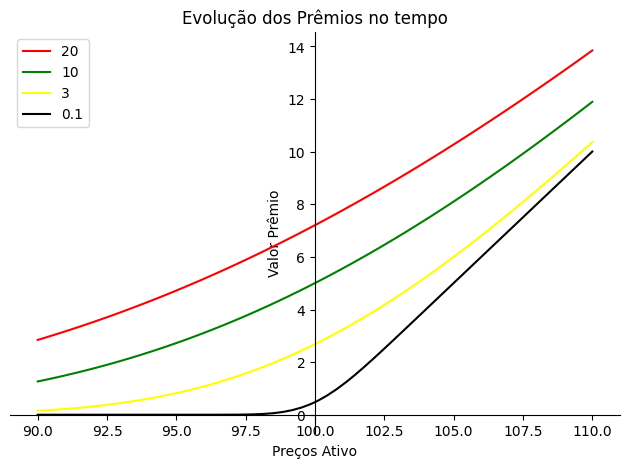

In [16]:
p[0].line_color = 'red'
p[0].label = '20'
p[1].line_color = 'green'
p[1].label = '10'
p[2].line_color = 'yellow'
p[2].label = '3'
p[3].line_color = 'black'
p[3].label = '0.1'
p.show()

In [17]:
Teta = theta(r, S, K, T, sigma, type="p")

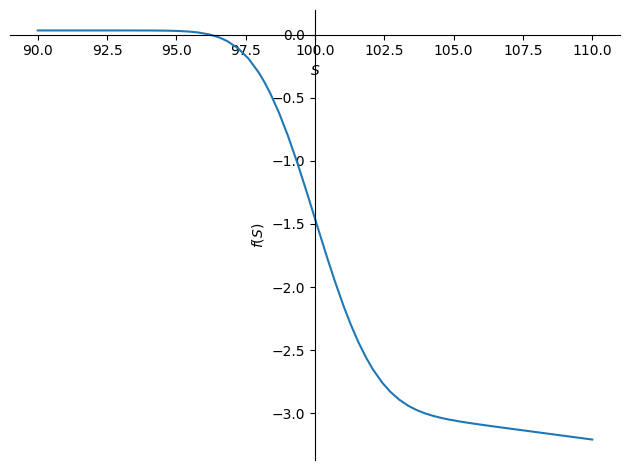

In [18]:
plot(Teta, (S, 90, 110))

In [19]:
Teta1 = theta(r, S, K, Ti[0], sigma, type="c")
Teta2 = theta(r, S, K, Ti[1], sigma, type="c")
Teta3 = theta(r, S, K, Ti[2], sigma, type="c")
Teta4 = theta(r, S, K, Ti[3], sigma, type="c")

In [20]:
p1 = plot(Teta1, Teta2, Teta3, Teta4, (S, 90, 110), show=False, title='Evolução do Theta no tempo', xlabel='Preços Ativo', ylabel='Theta',  legend=True)

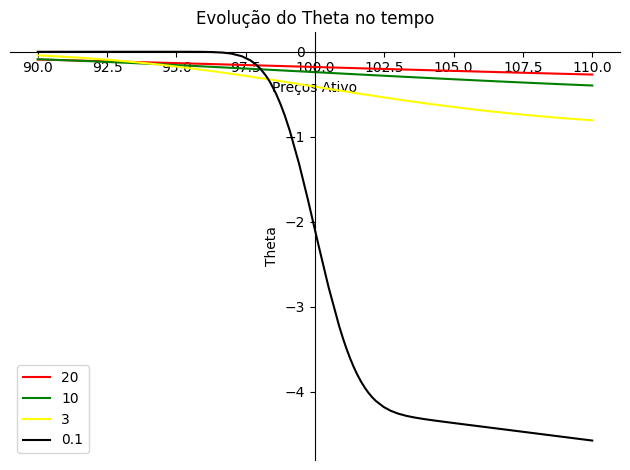

In [21]:
p1[0].line_color = 'red'
p1[0].label = '20'
p1[1].line_color = 'green'
p1[1].label = '10'
p1[2].line_color = 'yellow'
p1[2].label = '3'
p1[3].line_color = 'black'
p1[3].label = '0.1'
p1.show()

In [22]:
t = Symbol('t')
DTE = 60/252
S = 97          # Stock
BSDTE = BlackScholes(r, S, K, t/252, sigma, type="c")

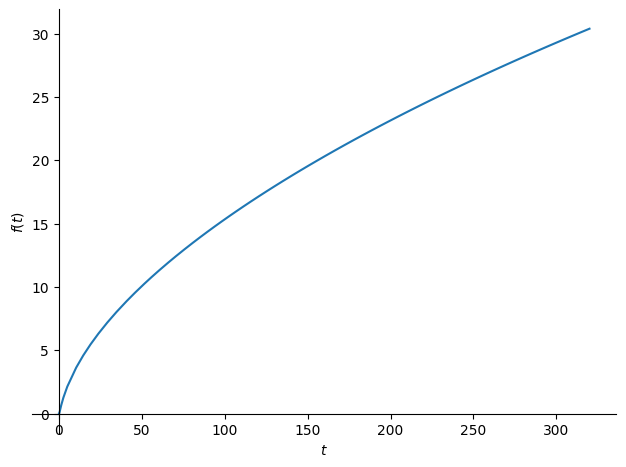

In [23]:
plot(BSDTE, (t, 0.0001, 320))

In [24]:
TP = 10
BSDTE = BlackScholes(r, S, K, TP/252, sigma, type="c")
BSDTE

3.53558114820009

In [25]:
DTE

0.23809523809523808

In [26]:
r = 0.125       # Interest tax
St = 97          # Stock
S = Symbol('S')
Kp = 95         # Stirke PUT
Kc = 105         # Stirke CALL
Ti = 20/252      # Time to end
T = 0.01/252
sigma = 0.60    # Volatility

In [27]:
BSp = BlackScholes(r, S, Kp, T, sigma, type="p")
PremioPUT = BlackScholes(r, St, Kp, Ti, sigma, type="p")

In [28]:
POFP = -BSp + PremioPUT

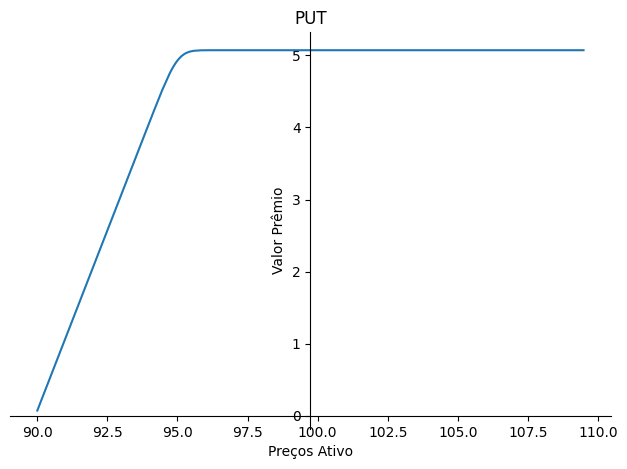

In [29]:
p = plot(POFP, (S, 90, 110), title='PUT', xlabel='Preços Ativo', ylabel='Valor Prêmio')

In [30]:
BSc = BlackScholes(r, S, Kc, T, sigma, type="c")
PremioCALL = BlackScholes(r, St, Kc, Ti, sigma, type="c")

In [31]:
POFC = -BSc + PremioCALL

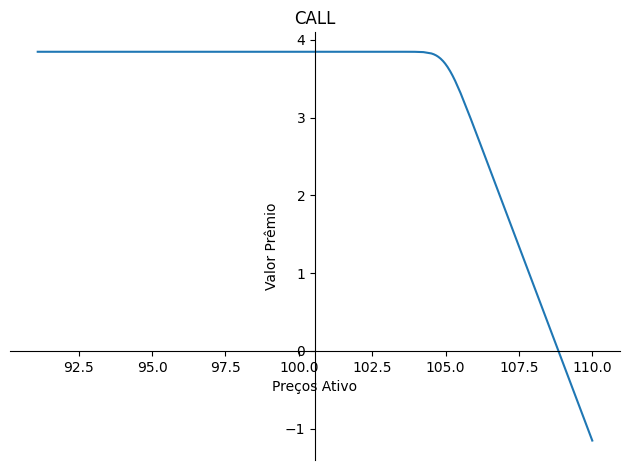

In [32]:
p = plot(POFC, (S, 90, 110), title='CALL', xlabel='Preços Ativo', ylabel='Valor Prêmio')

#Strangle

In [33]:
PayOff = POFP + POFC

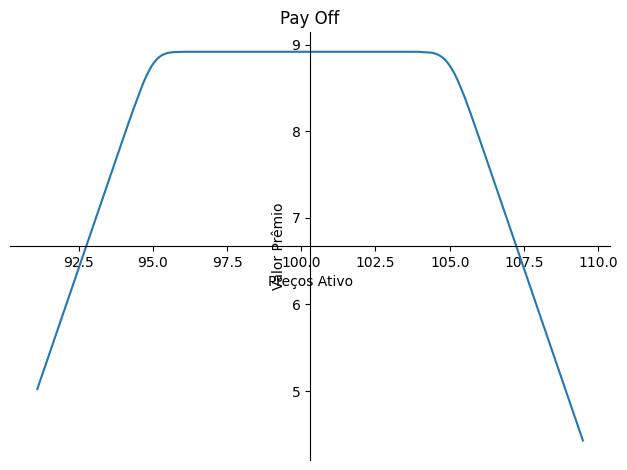

In [34]:
p = plot(PayOff, (S, 85, 110), title='Pay Off', xlabel='Preços Ativo', ylabel='Valor Prêmio')

# Venda Coberta (CALL)

In [39]:
r = 0.125       # Interest tax
#S = 97          # Stock
#S = Symbol('S')
K = 39         # Stirke
#T = 0.2/252      # Time to end
sigma = 0.25    # Volatility

In [43]:
Tii = [80/252,30/252,3.0/252,0.1/252]
BS11 = BlackScholes(r, S, K, Tii[0], sigma, type="c")
BS12 = BlackScholes(r, S, K, Tii[1], sigma, type="c")
BS13 = BlackScholes(r, S, K, Tii[2], sigma, type="c")
BS14 = BlackScholes(r, S, K, Tii[3], sigma, type="c")

In [45]:
p11 = plot(BS11, BS12, BS13, BS14, (S, 30, 50), show=False, title='Evolução dos Prêmios no tempo', xlabel='Preços Ativo', ylabel='Valor Prêmio',  legend=True)

/usr/local/lib/python3.10/dist-packages/sympy/plotting/plot.py:1634: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


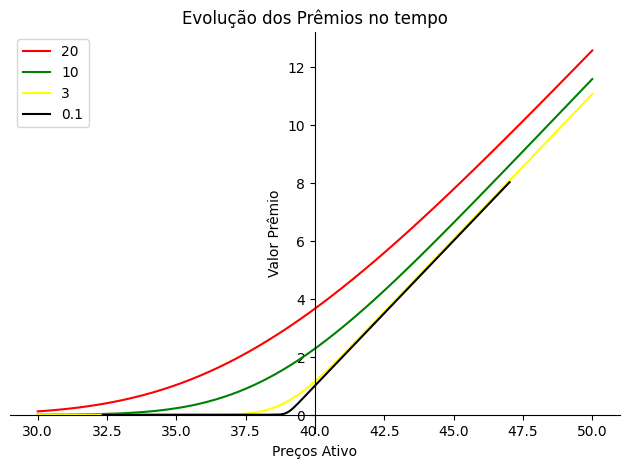

In [46]:
p11[0].line_color = 'red'
p11[0].label = '20'
p11[1].line_color = 'green'
p11[1].label = '10'
p11[2].line_color = 'yellow'
p11[2].label = '3'
p11[3].line_color = 'black'
p11[3].label = '0.1'
p11.show()

In [ ]:
pteste = plot(-BS12 (S, 30, 50), show=False, title='Evolução dos Prêmios no tempo', xlabel='Preços Ativo', ylabel='Valor Prêmio',  legend=True)

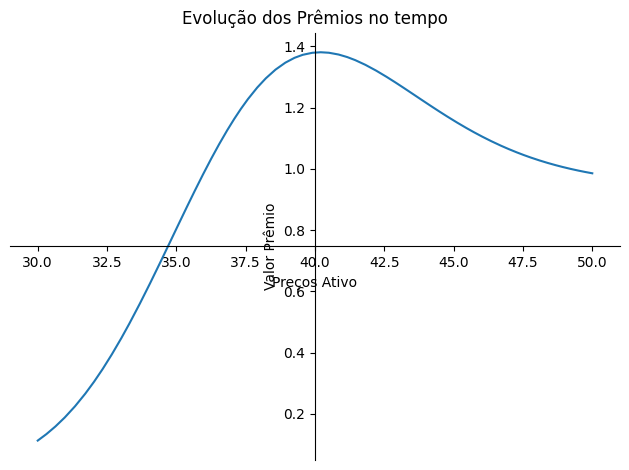

In [50]:
p111 = plot(BS11-BS12, (S, 30, 50), title='Evolução dos Prêmios no tempo', xlabel='Preços Ativo', ylabel='Valor Prêmio')

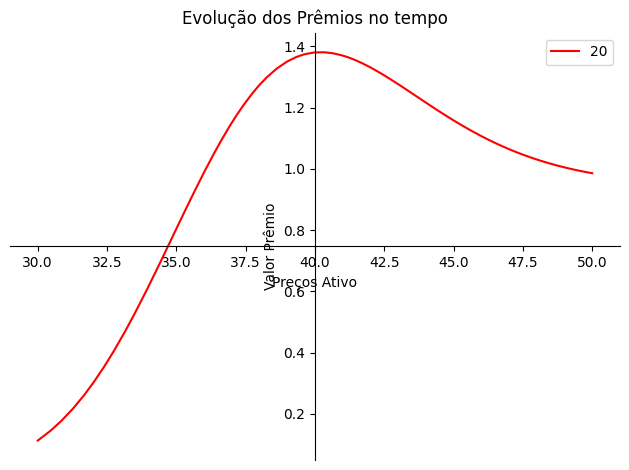

In [49]:
p111[0].line_color = 'red'
p111[0].label = '20'
p111.show()

In [ ]:
BS21 = BlackScholes(r, S, K, Tii[0], sigma, type="c")

#Trava Diagonal de CALL